<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue"></span> Feature Engineering</h1>
<hr>






### Import libraries and load the cleaned dataset.


In [13]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None  # default='warn'

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

 import the **cleaned** dataset

In [14]:
# Load cleaned dataset from Module 2
df = pd.read_csv('project_files/cleaned_df.csv')

display the first 5 rows from the dataset

In [15]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


<br id="domain">


<br>
We create an indicator variable to flag properties with 2 beds and 2 baths and name it <code style="color:steelblue">'two_and_two'</code>.

In [16]:
# Create indicator variable for properties with 2 beds and 2 baths
df['two_and_two'] = ( (df['beds'] == 2) & (df['baths'] == 2) ).astype(int)

Display the proportion of our observations that have 2 beds and 2 baths.

In [17]:
# Display percent of rows where two_and_two == 1
df.two_and_two.mean()

0.09458023379383634

We can also engineer an indicator feature for the housing market recession.


In [18]:
# Create indicator feature for transactions between 2010 and 2013, inclusive
df['during_recession'] = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)

In [19]:
# Print percent of transactions where during_recession == 1
df.during_recession.mean()

0.2635494155154091

In [20]:
# Set variable a as the earlier indicator variable (combining two masks)

a = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)


<br id="interaction">
# Create interaction features



<br>
We create <code style="color:steelblue">'property_age'</code> feature for the age of the property at the time of the transaction.

In [21]:
df.columns.values

array(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'property_type', 'exterior_walls', 'roof', 'basement',
       'restaurants', 'groceries', 'nightlife', 'cafes', 'shopping',
       'arts_entertainment', 'beauty_spas', 'active_life', 'median_age',
       'married', 'college_grad', 'property_tax', 'insurance',
       'median_school', 'num_schools', 'tx_year', 'two_and_two',
       'during_recession'], dtype=object)

In [22]:
# Create a property age feature
df['property_age'] = df.tx_year - df.year_built
print(df.property_age.head())

0     0
1    41
2    49
3     5
4    10
Name: property_age, dtype: int64


Do a quick sanity check. Print the minimum <code style="color:steelblue">'property_age'</code>.

In [23]:
# Should not be less than 0
print(df['property_age'].min())

-8


Print the number of observations with <code style="color:steelblue">'property_age'</code> less than 0.

In [24]:
# Number of observations with 'property_age' < 0
len(df[df.property_age < 0])
print("The number of rows in the dataframe df is", len(df))

The number of rows in the dataframe df is 1882


In [25]:
# Remove rows where property_age is less than 0
df = df[df.property_age >= 0]

# Print number of rows in remaining dataframe
print("The number of rows in the dataframe df is", len(df))

The number of rows in the dataframe df is 1863


In [26]:
# Create a school score feature that num_schools * median_school
df['school_score'] = df.median_school * df.num_schools

Now, let's add another interaction feature like the number of quality schools nearby




<br>
We can also create a new feature called <code style="color:steelblue">'school_score'</code> that is the product of <code style="color:steelblue">'num_schools'</code> and <code style="color:steelblue">'median_schools'</code>.

In [27]:
# Display median school score
df.school_score.median()
print(df.school_score.max())
print(df.school_score.min())

30.0
3.0


<br id="group">
# Group sparse classes


Let's begin by plotting the bar plots for <code style="color:steelblue">'exterior_walls'</code> again.

In [28]:
df['roof'].unique()

array(['Missing', 'Composition Shingle', 'Other', 'Gravel/Rock',
       'Roll Composition', 'Asphalt', 'Slate', 'Shake Shingle',
       'Built-up', 'Asbestos', 'Metal', 'Wood Shake/ Shingles',
       'Composition'], dtype=object)

In [29]:
df['exterior_walls'].value_counts().index

Index(['Brick', 'Siding (Alum/Vinyl)', 'Missing', 'Metal', 'Combination',
       'Wood', 'Wood Siding', 'Brick veneer', 'Stucco', 'Concrete Block',
       'Masonry', 'Other', 'Asbestos shingle', 'Wood Shingle'],
      dtype='object')

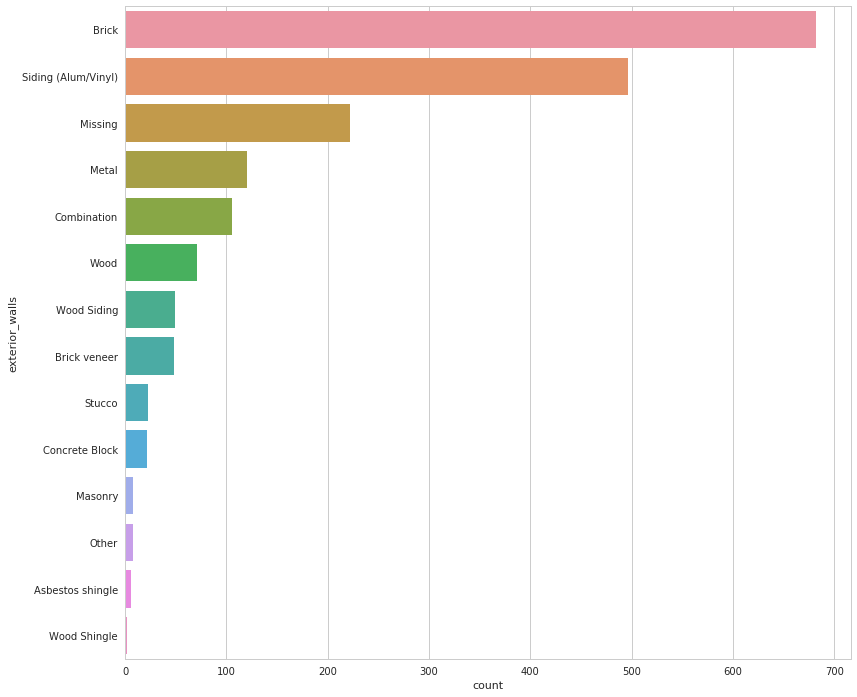

In [30]:
# Bar plot for exterior_walls
plt.figure(figsize = (13,12))
sns.set(style = "whitegrid")
sns.countplot(y = "exterior_walls", data = df, order = df['exterior_walls'].value_counts().index)
plt.show()

Group <code style="color:crimson">'Wood Siding'</code>, <code style="color:crimson">'Wood Shingle'</code>, and <code style="color:crimson">'Wood'</code> together. Label all of them as <code style="color:crimson">'Wood'</code>.

In [31]:
# Group 'Wood Siding' and 'Wood Shingle' with 'Wood'
df['exterior_walls'].replace(['Wood Siding', 'Wood Shingle', 'Wood'], "Wood", inplace = True)

Next, let's label <code style="color:crimson">'Stucco'</code>, <code style="color:crimson">'Other'</code>, <code style="color:crimson">'Asbestos shingle'</code>, <code style="color:crimson">'Concrete Block'</code>, and <code style="color:crimson">'Masonry'</code> as <code style="color:crimson;">'Other'</code>:

In [32]:
# List of classes to group
group_class = ["Stucco","Other","Asbestos shingle", "Concrete Block", "Masonry"]

# Group other classes into 'Other'
df['exterior_walls'].replace(group_class, "Other", inplace= True)

Finally, now that we've grouped together sparse classes, let's look at the bar plot for exterior walls again.

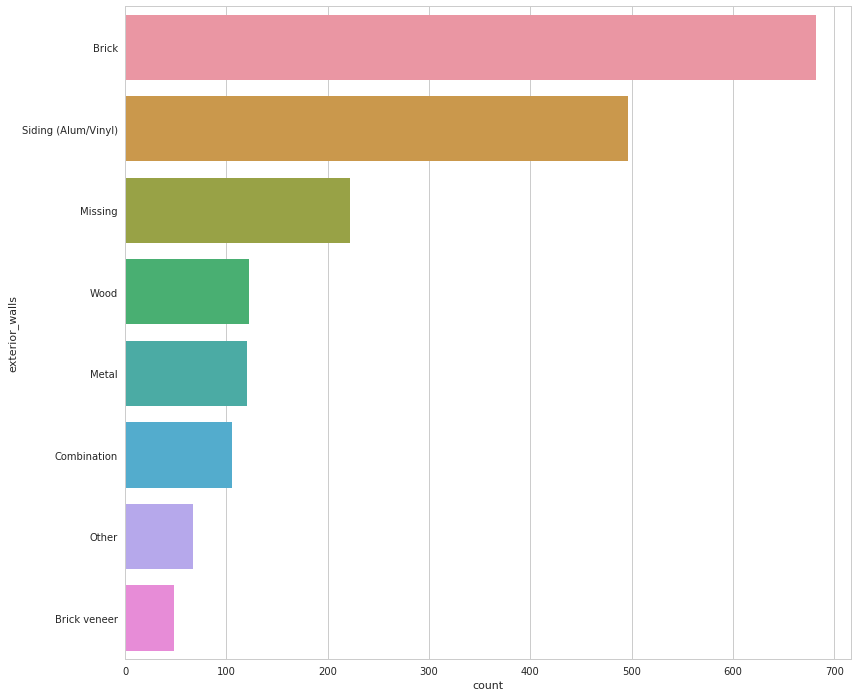

In [33]:
# Bar plot for exterior_walls

plt.figure(figsize = (13,12))
sns.set(style = "whitegrid")
sns.countplot(y = "exterior_walls", data = df, order = df['exterior_walls'].value_counts().index)
plt.show()

In [34]:
df['roof'].value_counts()

Composition Shingle     1162
Missing                  352
Asphalt                  136
Shake Shingle             59
Other                     49
Wood Shake/ Shingles      30
Gravel/Rock               30
Roll Composition          12
Asbestos                   9
Composition                9
Slate                      9
Metal                      4
Built-up                   2
Name: roof, dtype: int64

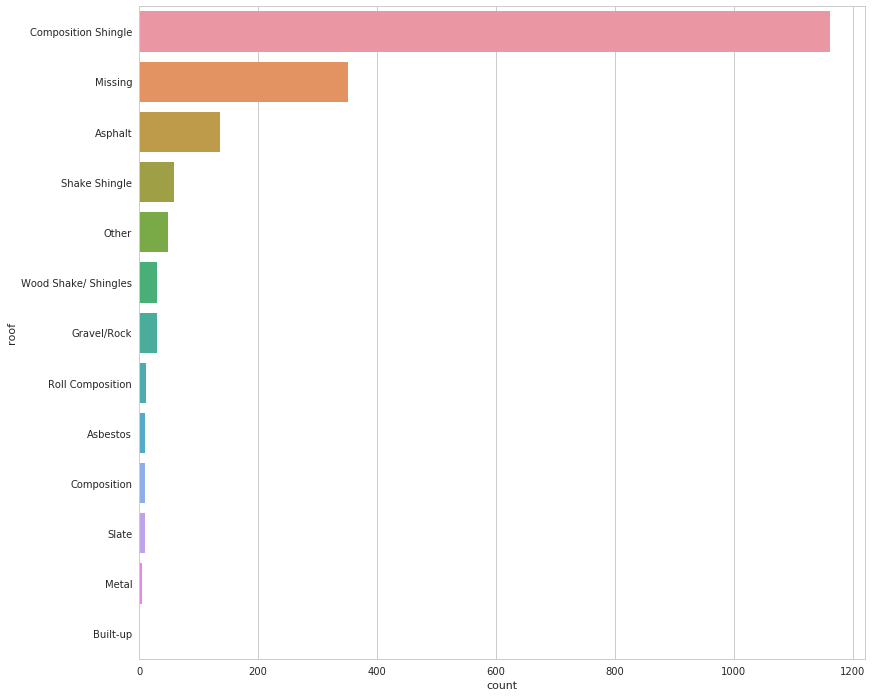

In [35]:
# Bar plot for roof
plt.figure(figsize = (13,12))
sns.set(style = "whitegrid")
sns.countplot(y = "roof", data = df, order = df['roof'].value_counts().index)
plt.show()

In [36]:
# Group 'Composition' and 'Wood Shake/ Shingles' into 'Composition Shingle'
df['roof'].replace(['Composition', 'Wood Shake/ Shingles', 'Composition Shingle'], 'Composition Shingle', inplace = True)

In [37]:
# List of classes to group
list = ['Other', "Gravel/Rock","Roll Composition", "Built-up",  "Asbestos", "Slate", "Metal"]

# Group other classes into 'Other'
df['roof'].replace(list, "Other", inplace = True)

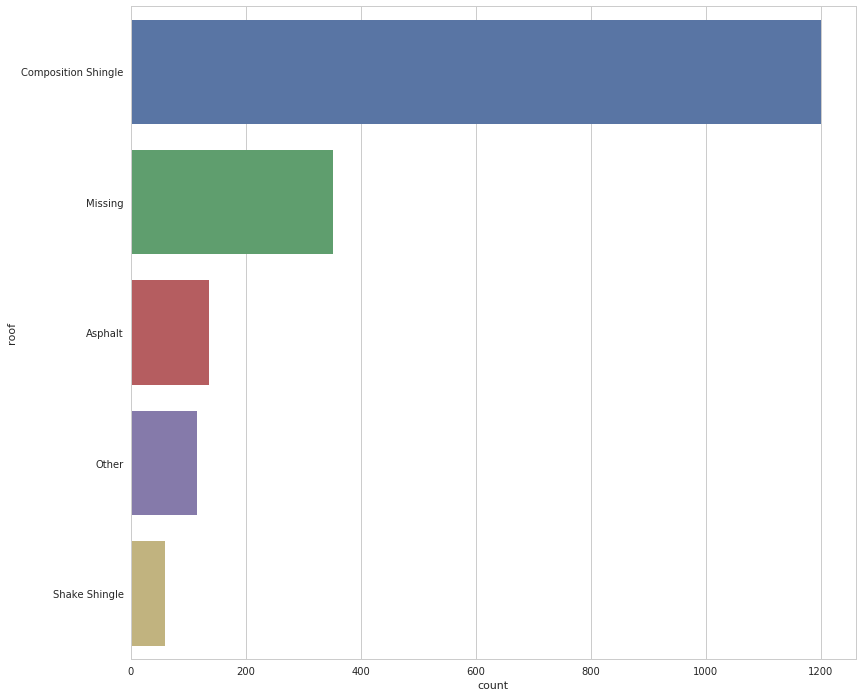

In [38]:
# Bar plot for roof
plt.figure(figsize = (13,12))
sns.set(style = "whitegrid")
sns.countplot(y = "roof", data = df, order = df['roof'].value_counts().index)
plt.show()


</div>



In [39]:
df.select_dtypes(include = ['object']).columns.values

# Let's break down this piece of code. so df.select_dtypes(exclude = ['object']) here returns a 
# dataframe, more specifically a dataframe which only has numeric columns. Now to access the 
# column headers of any df use .columns attribute and .values to get the headers as an array

array(['property_type', 'exterior_walls', 'roof'], dtype=object)

In [40]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns = ['property_type', 'exterior_walls', 'roof'])

<br id="dummy">
# Encode dummy variables



In [41]:
# First 5 rows of dataframe
df.head()
print(df.columns.values)

['tx_price' 'beds' 'baths' 'sqft' 'year_built' 'lot_size' 'basement'
 'restaurants' 'groceries' 'nightlife' 'cafes' 'shopping'
 'arts_entertainment' 'beauty_spas' 'active_life' 'median_age' 'married'
 'college_grad' 'property_tax' 'insurance' 'median_school' 'num_schools'
 'tx_year' 'two_and_two' 'during_recession' 'property_age' 'school_score'
 'property_type_Apartment / Condo / Townhouse'
 'property_type_Single-Family' 'exterior_walls_Brick'
 'exterior_walls_Brick veneer' 'exterior_walls_Combination'
 'exterior_walls_Metal' 'exterior_walls_Missing' 'exterior_walls_Other'
 'exterior_walls_Siding (Alum/Vinyl)' 'exterior_walls_Wood' 'roof_Asphalt'
 'roof_Composition Shingle' 'roof_Missing' 'roof_Other'
 'roof_Shake Shingle']


<br id="remove">
# Remove unused or redundant features

Finally, let's remove unused for redundant features from our dataset.

<br>
Drop <code style="color:steelblue">'tx_year'</code> and <code style="color:steelblue">'year_built'</code> from the dataset.

In [42]:
# Drop 'tx_year' and 'year_built' from the dataset
df.drop(['tx_year','year_built'], axis = 1)

,tx_price,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recession,property_age,school_score,property_type_Apartment / Condo / Townhouse,property_type_Single-Family,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle
0,295850,1,1,584,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,0,1,0,27.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,216500,1,1,612,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,0,0,41,9.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,279900,1,1,615,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,0,1,49,24.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,379900,1,1,618,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,0,0,5,27.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,340000,1,1,634,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,0,0,10,27.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,265000,1,1,641,0,0.0,146,10,23,27,86,9,60,52,28.0,15.0,86.0,168.0,58.0,8.0,3.0,0,0,57,24.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,240000,1,1,642,0,0.0,159,13,36,17,92,12,66,50,28.0,36.0,88.0,176.0,61.0,7.0,3.0,0,1,67,21.0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
7,388100,1,1,650,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,266.0,92.0,9.0,3.0,0,0,5,27.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
8,240000,1,1,660,0,0.0,51,8,6,2,40,18,32,41,36.0,49.0,77.0,188.0,65.0,6.0,3.0,0,1,30,18.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,250000,1,1,664,0,0.0,119,10,26,25,183,13,70,36,57.0,13.0,83.0,147.0,51.0,6.0,3.0,0,0,42,18.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Save the analytical base table.

In [43]:
# Save analytical base table
df.to_csv("analytical-base-table.csv")